In [2]:
#Download any necessary datasets & dependencies, only need to do this once
#import sys
#!{sys.executable} -m pip install spacy
#!{sys.executable} -m spacy download en_core_web_lg
#!{sys.executable} -m pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bc5cdr_md-0.4.0.tar.gz
#!{sys.executable} -m pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bionlp13cg_md-0.4.0.tar.gz
#!{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install pandas
#!{sys.executable} -m pip install requests
#!{sys.executable} -m pip install matplotlib

#Installing dependencies for classify_abs.py
#!{sys.executable} -m pip install tensorflow
#!{sys.executable} -m pip install nltk
#import nltk
#nltk.download('stopwords')
#nltk.download('punkt')

import numpy as np
import pandas as pd
import requests
import xml.etree.ElementTree as ET
import spacy
import time
import datetime
from collections import OrderedDict
import matplotlib.pyplot as plt; plt.rcdefaults()

2021-07-06 11:01:44.491562: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-06 11:01:44.491587: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
df = pd.read_csv('all_dz_abstract_set20.csv')

In [4]:
df.tail()

,disease,pmid,abstract
98547,Sphingosine phosphate lyase insufficiency synd...,34131653,Systemic sclerosis (SSc) is a connective tissu...
98548,Sphingosine phosphate lyase insufficiency synd...,34155851,<h4>Background</h4>Surgical interventions in p...
98549,Sphingosine phosphate lyase insufficiency synd...,34163540,<h4>Background</h4>Systemic sclerosis (SSc) al...
98550,Sphingosine phosphate lyase insufficiency synd...,34071779,<b>Objective:</b> This nationwide study aimed ...
98551,Sphingosine phosphate lyase insufficiency synd...,33548375,Digital ulcers (DU) are one of the most common...


In [4]:
dz_num = {}
for row in df.iterrows():
    if len(row[1][2])>5: #Check abstract length
        if row[1][0] in dz_num.keys(): #Check if disease name is in dictionary
            dz_num[row[1][0]]+=1
        else:
            dz_num[row[1][0]] = 1
    if len(row[1][2])<=5:
        if row[1][0] not in dz_num.keys():
            dz_num[row[1][0]] = 0

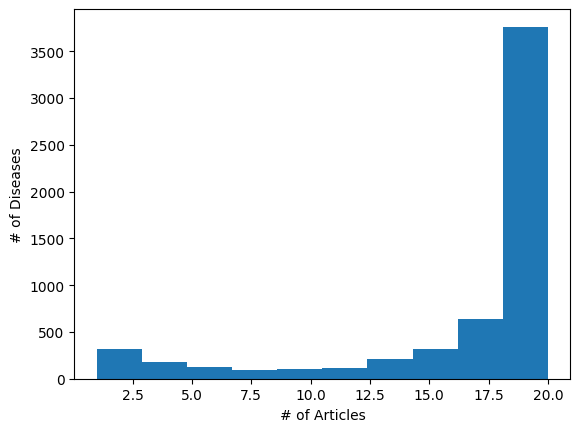

In [5]:
#Plot the figure
objects = tuple(dz_num)
performance = list(dz_num.values())
#y_pos = np.arange(performance)

fig = plt.figure()
plt.ylabel('# of Diseases')
plt.xlabel('# of Articles')
plt.hist(performance)

plt.show()

In [6]:
fig.savefig('All_Disease_Hist20.png', dpi=400, bbox_inches='tight')

In [7]:
dz_num_less5 ={}
zero, five, ten, fifteen,twentyplus =0,0,0,0,0
for k, v in dz_num.items():
        if v<20:
            dz_num_less5[k]=v
        if v>=20:
            twentyplus+=1
        elif v>=15:
            fifteen+=1
        elif v>=10:
            ten+=1
        elif v>=5:
            five+=1
        elif v<5:
            zero+=1

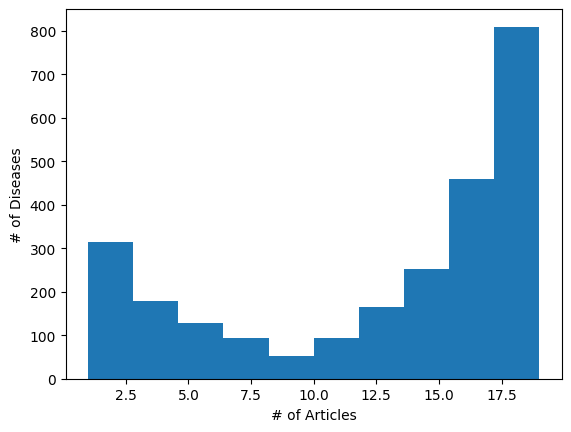

In [8]:
#Plot the figure
objects = tuple(dz_num_less5)
performance = list(dz_num_less5.values())
#y_pos = np.arange(performance)

fig = plt.figure()
plt.ylabel('# of Diseases')
plt.xlabel('# of Articles')
plt.hist(performance)

plt.show()

In [9]:
print(zero)
print(five)
print(ten)
print(fifteen)
print(twentyplus)

494
275
372
1405
3314


In [10]:
fig.savefig('All_Disease20_Less5_Hist.png', dpi=400, bbox_inches='tight')